
**Assigment 2 (PySpark-MLlib)**

---

**Target**

Make sure that you have learned the basics about spark how to prepare the
data and apply a machine learning model.

---

**Task**

Given a Diabetes Dataset, use PySpark to implement a Machine learing pipeline
to predicate Diabetes.

https://www.kaggle.com/datasets/mathchi/diabetes-data-set

Required :
1.Prepare the data and do what you see regarding the preprocessing (
including the visualization )

2.Build a machine learing model to predict based on diagnostic
measurements whether a patient has diabetes.

3.Evaluate your model .(Select the appropriate metric to assess your model
with)

---



# **1.Prepare the data and do what you see regarding the preprocessing ( including the visualization )**

In [ ]:
!pip install pyspark py4j

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.pipeline import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [ ]:
df=spark.read.csv("/content/diabetes.csv", header=True, inferSchema=True)

In [ ]:
df.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [ ]:
df

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [ ]:
df.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [ ]:
df.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [ ]:
df = df.na.drop()

In [ ]:
df.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [ ]:
Outcome=df.select("outcome").toPandas()

In [ ]:
Outcome

,outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


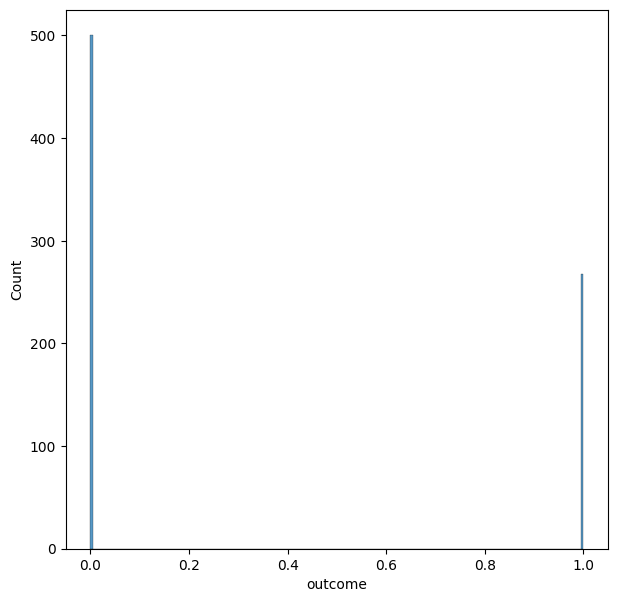

In [ ]:
plt.figure(figsize=(7,7))
sns.histplot(Outcome['outcome'],bins=200)
plt.show()

In [ ]:
features=[i for i in df.columns if i != "Outcome"]

In [ ]:
vecAssembler=VectorAssembler(inputCols=features,outputCol="features")

In [ ]:
standerd=StandardScaler(inputCol="features", outputCol="standerd")

In [ ]:
pl=Pipeline(stages=[vecAssembler,standerd])

In [ ]:
new_df = pl.fit(df).transform(df)

In [ ]:
new_df.show(3)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+--------------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|            features|            standerd|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+--------------------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|[6.0,148.0,72.0,3...|[1.78063837321943...|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|[1.0,85.0,66.0,29...|[0.29677306220323...|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|[8.0,183.0,64.0,0...|[2.37418449762590...|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+--------------------+
only s

# 2.Build a machine learing model to predict based on diagnostic measurements whether a patient has diabetes.

In [ ]:
(train,test)=new_df.randomSplit([.8,.2],seed=42)

In [ ]:
lr=LogisticRegression(featuresCol="features", labelCol="Outcome")

In [ ]:
new_pl=Pipeline(stages=[lr])

In [ ]:
train

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,features,standerd
0,57,60,0,0,21.7,0.735,67,0,"[0.0,57.0,60.0,0....","[0.0,1.7827754878..."
0,67,76,0,0,45.3,0.194,46,0,"[0.0,67.0,76.0,0....","[0.0,2.0955431172..."
0,74,52,10,36,27.8,0.269,22,0,"[0.0,74.0,52.0,10...","[0.0,2.3144804578..."
0,78,88,29,40,36.9,0.434,21,0,"[0.0,78.0,88.0,29...","[0.0,2.4395875096..."
0,84,64,22,66,35.8,0.545,21,0,"[0.0,84.0,64.0,22...","[0.0,2.6272480873..."
0,86,68,32,0,35.8,0.238,25,0,"[0.0,86.0,68.0,32...","[0.0,2.6898016132..."
0,91,80,0,0,32.4,0.601,27,0,"[0.0,91.0,80.0,0....","[0.0,2.8461854279..."
0,93,60,0,0,35.3,0.263,25,0,"[0.0,93.0,60.0,0....","[0.0,2.9087389538..."
0,93,60,25,92,28.7,0.532,22,0,"[0.0,93.0,60.0,25...","[0.0,2.9087389538..."
0,93,100,39,72,43.4,1.021,35,0,"[0.0,93.0,100.0,3...","[0.0,2.9087389538..."


In [ ]:
test

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,features,standerd
0,73,0,0,0,21.1,0.342,25,0,"(8,[1,5,6,7],[73....","(8,[1,5,6,7],[2.2..."
0,84,82,31,125,38.2,0.233,23,0,"[0.0,84.0,82.0,31...","[0.0,2.6272480873..."
0,91,68,32,210,39.9,0.381,25,0,"[0.0,91.0,68.0,32...","[0.0,2.8461854279..."
0,94,0,0,0,0.0,0.256,25,0,"(8,[1,6,7],[94.0,...","(8,[1,6,7],[2.940..."
0,98,82,15,84,25.2,0.299,22,0,"[0.0,98.0,82.0,15...","[0.0,3.0651227685..."
0,101,62,0,0,21.9,0.336,25,0,"[0.0,101.0,62.0,0...","[0.0,3.1589530573..."
0,102,75,23,0,0.0,0.572,21,0,"[0.0,102.0,75.0,2...","[0.0,3.1902298203..."
0,105,64,41,142,41.5,0.173,22,0,"[0.0,105.0,64.0,4...","[0.0,3.2840601091..."
0,111,65,0,0,24.6,0.66,31,0,"[0.0,111.0,65.0,0...","[0.0,3.4717206868..."
0,113,76,0,0,33.3,0.278,23,1,"[0.0,113.0,76.0,0...","[0.0,3.5342742127..."


In [ ]:
pl_model=new_pl.fit(train)

In [ ]:
predictions=pl_model.transform(test)

In [ ]:
predictions

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,features,standerd,rawPrediction,probability,prediction
0,73,0,0,0,21.1,0.342,25,0,"(8,[1,5,6,7],[73....","(8,[1,5,6,7],[2.2...",[3.06153170568647...,[0.95527778035130...,0.0
0,84,82,31,125,38.2,0.233,23,0,"[0.0,84.0,82.0,31...","[0.0,2.6272480873...",[2.66947242483774...,[0.93520106766183...,0.0
0,91,68,32,210,39.9,0.381,25,0,"[0.0,91.0,68.0,32...","[0.0,2.8461854279...",[1.97452878409872...,[0.87809671791306...,0.0
0,94,0,0,0,0.0,0.256,25,0,"(8,[1,6,7],[94.0,...","(8,[1,6,7],[2.940...",[4.37628255920671...,[0.98758408541814...,0.0
0,98,82,15,84,25.2,0.299,22,0,"[0.0,98.0,82.0,15...","[0.0,3.0651227685...",[3.27608735843840...,[0.96359929366418...,0.0
0,101,62,0,0,21.9,0.336,25,0,"[0.0,101.0,62.0,0...","[0.0,3.1589530573...",[2.98232158485755...,[0.95176905482943...,0.0
0,102,75,23,0,0.0,0.572,21,0,"[0.0,102.0,75.0,2...","[0.0,3.1902298203...",[4.93838217496840...,[0.99288480614979...,0.0
0,105,64,41,142,41.5,0.173,22,0,"[0.0,105.0,64.0,4...","[0.0,3.2840601091...",[1.54599423756722...,[0.82433442208141...,0.0
0,111,65,0,0,24.6,0.66,31,0,"[0.0,111.0,65.0,0...","[0.0,3.4717206868...",[1.97067644512695...,[0.87768375148767...,0.0
0,113,76,0,0,33.3,0.278,23,1,"[0.0,113.0,76.0,0...","[0.0,3.5342742127...",[1.87586073535898...,[0.86713495811880...,0.0


# 3.Evaluate your model .(Select the appropriate metric to assess your model with)

In [ ]:
cl_eval = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Outcome")

In [ ]:
AUC_SCORE = cl_eval.evaluate(predictions)

In [ ]:
print("Area under the curve :", AUC_SCORE)

Area under the curve : 0.8619186046511628


In [ ]:
precision = predictions.filter(predictions["Outcome"] == predictions["prediction"]).count() / predictions.count()
print("Precision:", precision)

Precision: 0.7804878048780488


In [ ]:
predictions.select("Outcome", "prediction", "probability").show()

+-------+----------+--------------------+
|Outcome|prediction|         probability|
+-------+----------+--------------------+
|      0|       0.0|[0.95527778035130...|
|      0|       0.0|[0.93520106766183...|
|      0|       0.0|[0.87809671791306...|
|      0|       0.0|[0.98758408541814...|
|      0|       0.0|[0.96359929366418...|
|      0|       0.0|[0.95176905482943...|
|      0|       0.0|[0.99288480614979...|
|      0|       0.0|[0.82433442208141...|
|      0|       0.0|[0.87768375148767...|
|      1|       0.0|[0.86713495811880...|
|      0|       0.0|[0.82056976963441...|
|      0|       1.0|[0.36338788519267...|
|      0|       0.0|[0.73184959052007...|
|      0|       0.0|[0.72589362953628...|
|      1|       0.0|[0.85036140611132...|
|      0|       0.0|[0.73150296943056...|
|      0|       0.0|[0.70819691332215...|
|      0|       1.0|[0.06760191866465...|
|      0|       0.0|[0.99522579730719...|
|      0|       0.0|[0.95761800456004...|
+-------+----------+--------------

In [ ]:
test.describe().select("summary","Outcome").show()

+-------+-------------------+
|summary|            Outcome|
+-------+-------------------+
|  count|                123|
|   mean|0.34959349593495936|
| stddev| 0.4787918510988485|
|    min|                  0|
|    max|                  1|
+-------+-------------------+

